In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [68]:
df= pd.read_csv(r'C:\Users\punit\Downloads\Rotten+Tomatoes+Movies.csv\Rotten Tomatoes Movies.csv')
df.head()


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [70]:
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [71]:
null_percent = df.isnull().sum() / len(df) * 100
null_percent[null_percent > 0].sort_values(ascending=False) 

critics_consensus     50.060103
writers                8.107946
in_theaters_date       4.898425
studio_name            2.500301
cast                   1.706936
audience_count         1.514605
audience_rating        1.514605
runtime_in_minutes     0.931602
directors              0.685179
movie_info             0.144248
genre                  0.102176
on_streaming_date      0.012021
dtype: float64

In [72]:
df=df.drop(columns=['critics_consensus'])

In [73]:
df.head()

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [74]:
drop_null = df.dropna(inplace=True)

In [75]:
duplicates = df.duplicated()
duplicates.sum()
drop_duplicates = df.drop_duplicates().reset_index(drop=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14090 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         14090 non-null  object 
 1   movie_info          14090 non-null  object 
 2   rating              14090 non-null  object 
 3   genre               14090 non-null  object 
 4   directors           14090 non-null  object 
 5   writers             14090 non-null  object 
 6   cast                14090 non-null  object 
 7   in_theaters_date    14090 non-null  object 
 8   on_streaming_date   14090 non-null  object 
 9   runtime_in_minutes  14090 non-null  float64
 10  studio_name         14090 non-null  object 
 11  tomatometer_status  14090 non-null  object 
 12  tomatometer_rating  14090 non-null  int64  
 13  tomatometer_count   14090 non-null  int64  
 14  audience_rating     14090 non-null  float64
 15  audience_count      14090 non-null  float64
dtypes: float6

In [77]:
genre=df.groupby('genre')['movie_title'].count().sort_values(ascending=False)
print(genre)

genre
Drama                                                     1518
Comedy                                                    1052
Comedy, Drama                                              775
Drama, Mystery & Suspense                                  634
Art House & International, Drama                           500
                                                          ... 
Science Fiction & Fantasy, Western                           1
Science Fiction & Fantasy, Special Interest                  1
Science Fiction & Fantasy, Romance                           1
Mystery & Suspense, Special Interest                         1
Mystery & Suspense, Science Fiction & Fantasy, Western       1
Name: movie_title, Length: 979, dtype: int64


In [78]:
rating=df.groupby('rating')['movie_title'].count().sort_values(ascending=False)
print(rating)

rating
R         5650
NR        3299
PG-13     2672
PG        1851
G          580
NC17        34
PG-13)       3
R)           1
Name: movie_title, dtype: int64


In [79]:
average_runtime=df['runtime_in_minutes'].mean()
print(average_runtime)

103.64684173172462


In [80]:
top_studio = df.groupby('studio_name')['movie_title'].count().sort_values(ascending=False).head(10)
print(top_studio)

studio_name
Paramount Pictures                  473
Warner Bros. Pictures               472
Universal Pictures                  457
20th Century Fox                    404
IFC Films                           355
Sony Pictures Home Entertainment    346
Warner Home Video                   338
MGM                                 246
MGM Home Entertainment              241
Sony Pictures Classics              238
Name: movie_title, dtype: int64


In [81]:
distribution_of_movie_year = df['in_theaters_date'].value_counts().sort_index()
print(distribution_of_movie_year)

in_theaters_date
1914-06-01    1
1915-01-01    1
1915-03-03    1
1916-09-05    1
1919-05-13    1
             ..
2019-10-04    6
2019-10-08    2
2019-10-11    4
2019-10-18    2
2019-10-25    1
Name: count, Length: 5198, dtype: int64


                           movie_title  tomatometer_rating
16571                Young Mr. Lincoln                 100
3      12 Angry Men (Twelve Angry Men)                 100
13                  The Breaking Point                 100
14                          Adam's Rib                 100
16       The Prowler (Cost of Living )                 100
...                                ...                 ...
313                   The Black Pirate                 100
299                       Battleground                 100
208                      Anna Karenina                 100
87                          Borderland                 100
76             Four Sheets to the Wind                 100

[584 rows x 2 columns]
              movie_title  audience_rating
1800           Ice People            100.0
7137                Haunt            100.0
9051      Little Monsters            100.0
14566   The Miners' Hymns            100.0
15001     The Uncondemned            100.0
16438  Won

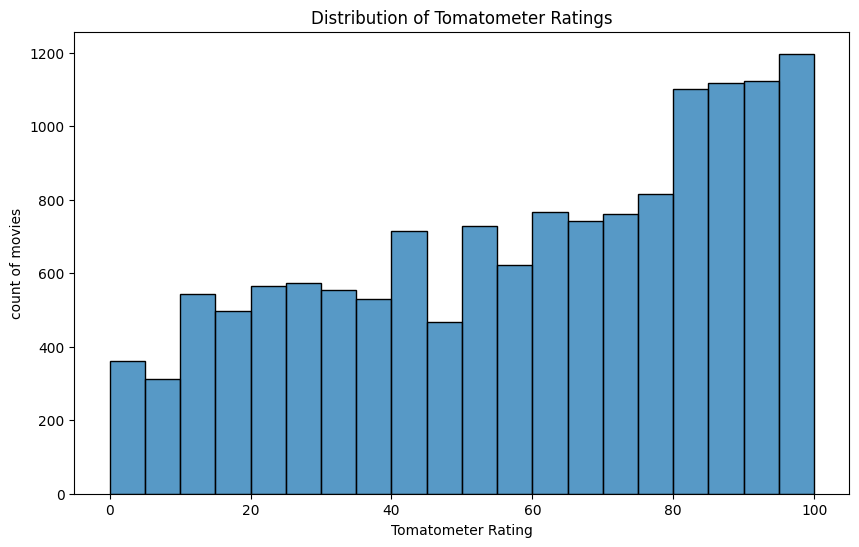

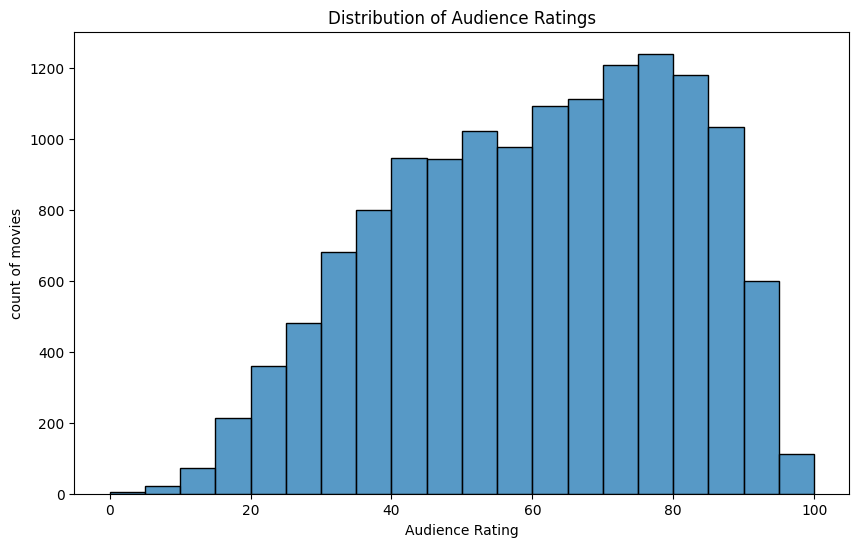

In [82]:
highest_rated_movie_by_trating = df.loc[df['tomatometer_rating'] == 100, ['movie_title', 'tomatometer_rating']].sort_values(by='tomatometer_rating', ascending=False)
print(highest_rated_movie_by_trating)
highest_rated_movie_by_audience = df.loc[df['audience_rating'] == 100, ['movie_title', 'audience_rating']].sort_values(by='audience_rating', ascending=False)
print(highest_rated_movie_by_audience)
common_in_both = pd.merge(highest_rated_movie_by_trating, highest_rated_movie_by_audience, on='movie_title', how='inner')
print(common_in_both)
    
plt.figure(figsize=(10, 6))
sns.histplot(df['tomatometer_rating'], bins=20)
plt.title('Distribution of Tomatometer Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('count of movies')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['audience_rating'], bins=20)
plt.title('Distribution of Audience Ratings')
plt.xlabel('Audience Rating')  
plt.ylabel('count of movies')
plt.show()


In [83]:
distribution_of_duration = df['runtime_in_minutes'].value_counts().sort_values(ascending=False).head(10)
print(distribution_of_duration)

runtime_in_minutes
90.0     663
100.0    481
95.0     462
96.0     420
98.0     400
105.0    397
93.0     393
94.0     389
97.0     374
92.0     362
Name: count, dtype: int64


In [84]:
outliers_in_duration = df[(df['runtime_in_minutes'] < 60) | (df['runtime_in_minutes'] > 180)]
print(outliers_in_duration[['movie_title', 'runtime_in_minutes']])

                                             movie_title  runtime_in_minutes
323                                           The Border                 1.0
368                                            Cleopatra               246.0
398                                       Doctor Zhivago               193.0
402                       How the Grinch Stole Christmas                26.0
420                                               Exodus               208.0
...                                                  ...                 ...
15722                                    United Red Army               190.0
15824                                         Veer-Zaara               192.0
15989                                      War and Peace               208.0
16416  Frau im Mond (By Rocket to the Moon) (Woman in...                12.0
16564                           The Young Black Stallion                45.0

[154 rows x 2 columns]


                    tomatometer_rating  audience_rating
tomatometer_rating            1.000000         0.668687
audience_rating               0.668687         1.000000


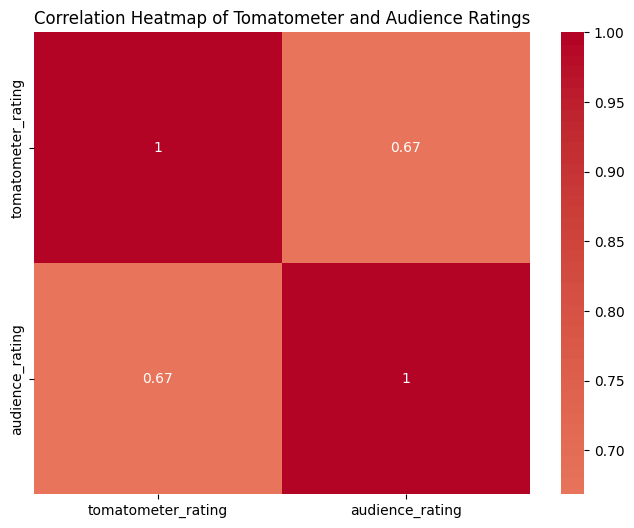

In [85]:
corelation_of_tomato_rating_and_audience_rating = df[['tomatometer_rating', 'audience_rating']].corr()
print(corelation_of_tomato_rating_and_audience_rating)
plt.figure(figsize=(8, 6))
sns.heatmap(corelation_of_tomato_rating_and_audience_rating, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Tomatometer and Audience Ratings')
plt.show()




C:\Users\punit\AppData\Local\Temp\ipykernel_22024\3193806661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_ratings['genre'] = df_genre_ratings['genre'].str.split(',')


                           tomatometer_rating  audience_rating
genre                                                         
Classics                            79.584398        71.572966
Documentary                         77.982103        72.527964
Special Interest                    73.758725        70.719272
Art House & International           70.789370        67.326772
Television                          69.845638        65.993289
Western                             69.515152        65.117424
Musical & Performing Arts           68.969208        69.476540
Sports & Fitness                    68.159091        73.780303
Anime & Manga                       66.333333        72.750000
Drama                               62.757862        63.247420


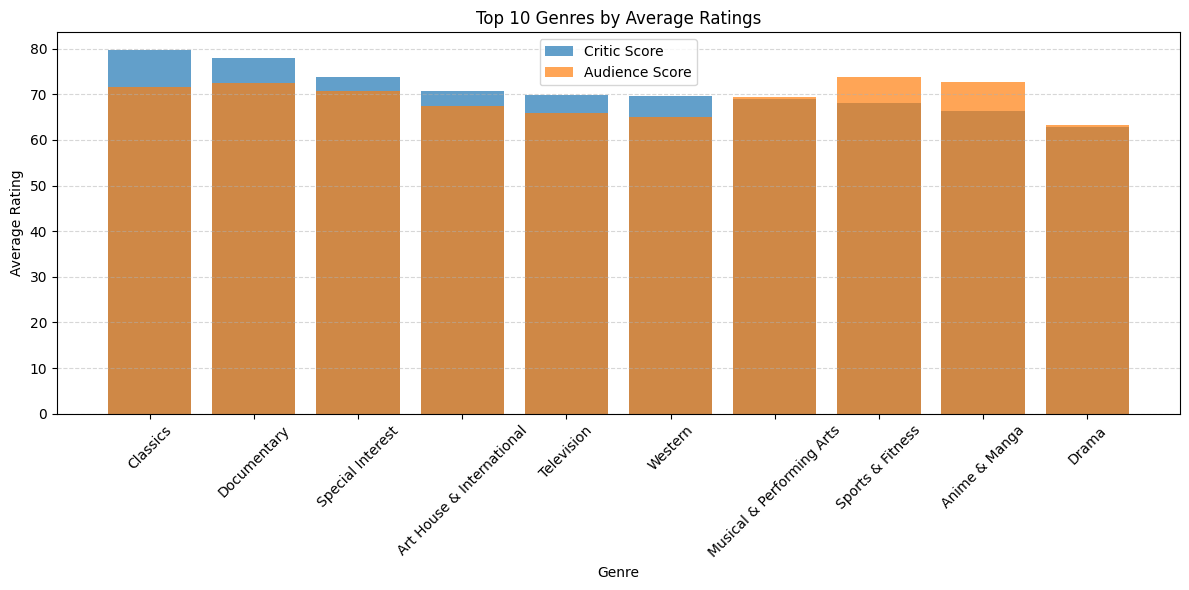

In [86]:
df_genre_ratings = df[['genre', 'tomatometer_rating', 'audience_rating']]
df_genre_ratings['genre'] = df_genre_ratings['genre'].str.split(',')
df_genre_ratings = df_genre_ratings.explode('genre')
df_genre_ratings['genre'] = df_genre_ratings['genre'].str.strip()
genre_scores = df_genre_ratings.groupby('genre')[['tomatometer_rating', 'audience_rating']].mean().sort_values(by='tomatometer_rating', ascending=False)
print(genre_scores.head(10))

top_genres = genre_scores.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_genres.index, top_genres['tomatometer_rating'], label='Critic Score', alpha=0.7)
plt.bar(top_genres.index, top_genres['audience_rating'], label='Audience Score', alpha=0.7)
plt.title('Top 10 Genres by Average Ratings')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



     year  tomatometer_rating  audience_rating
0    1914          100.000000        69.000000
1    1915           89.000000        56.000000
2    1916           97.000000        77.000000
3    1919           95.000000        71.000000
4    1920           92.400000        78.400000
..    ...                 ...              ...
99   2015           57.294849        53.387211
100  2016           58.619962        54.545106
101  2017           60.290672        57.316703
102  2018           61.327968        59.120724
103  2019           61.269504        61.957447

[104 rows x 3 columns]


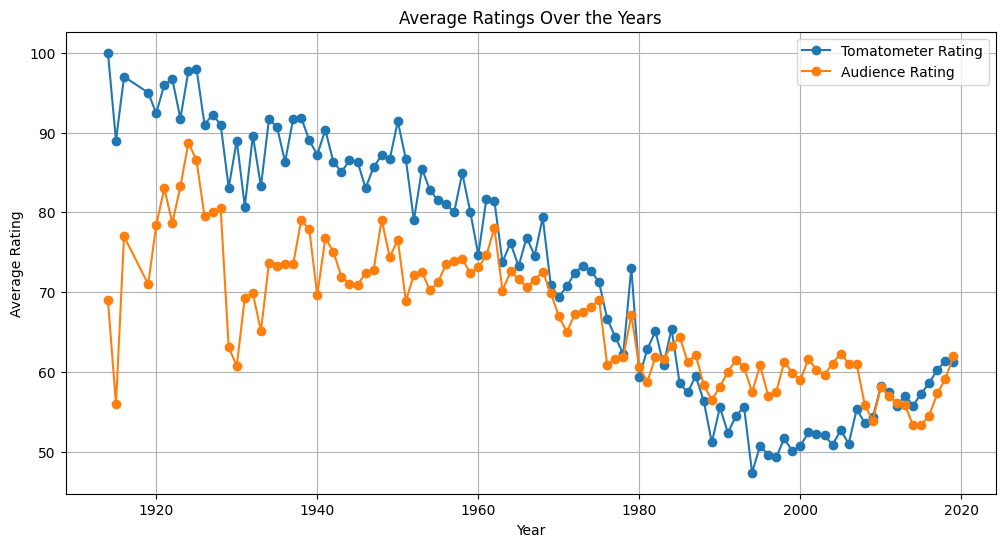

In [87]:
years = df['in_theaters_date'].str.split('-', expand=True)[0].astype(int)
df['year'] = years
year_rating = df.groupby('year').agg({'tomatometer_rating': 'mean', 'audience_rating': 'mean'}).reset_index()
year_rating.columns = ['year', 'tomatometer_rating', 'audience_rating']
print(year_rating)
plt.figure(figsize=(12, 6))
plt.plot(year_rating['year'], year_rating['tomatometer_rating'], label='Tomatometer Rating', marker='o')
plt.plot(year_rating['year'], year_rating['audience_rating'], label='Audience Rating', marker='o')
plt.title('Average Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.grid()
plt.show()

In [88]:
directors_most_movies = df['directors'].value_counts().head(10)
print(directors_most_movies)

directors
Alfred Hitchcock     36
Woody Allen          35
Clint Eastwood       34
Steven Spielberg     32
Sidney Lumet         28
John Ford            27
Blake Edwards        26
Steven Soderbergh    25
Ridley Scott         24
Barry Levinson       22
Name: count, dtype: int64


                                        directors  tomatometer_rating  \
2160                                  Franz Osten               100.0   
2159                             Frantisek Vlácil               100.0   
2128                                 Franco Rosso               100.0   
2169  Fred Caruso, Casper Andreas, Fred M. Caruso               100.0   
2149                  Frank Perry, Sydney Pollack               100.0   
5661                                 Robi Michael               100.0   
5648                                 Robert Wiene               100.0   
5617                            Robert Montgomery               100.0   
5592                                 Robert Hamer               100.0   
5581                          Robert Ellis Miller               100.0   

      audience_rating  
2160             47.0  
2159             87.0  
2128             38.0  
2169             67.0  
2149             82.0  
5661             73.0  
5648             89.0  
5617

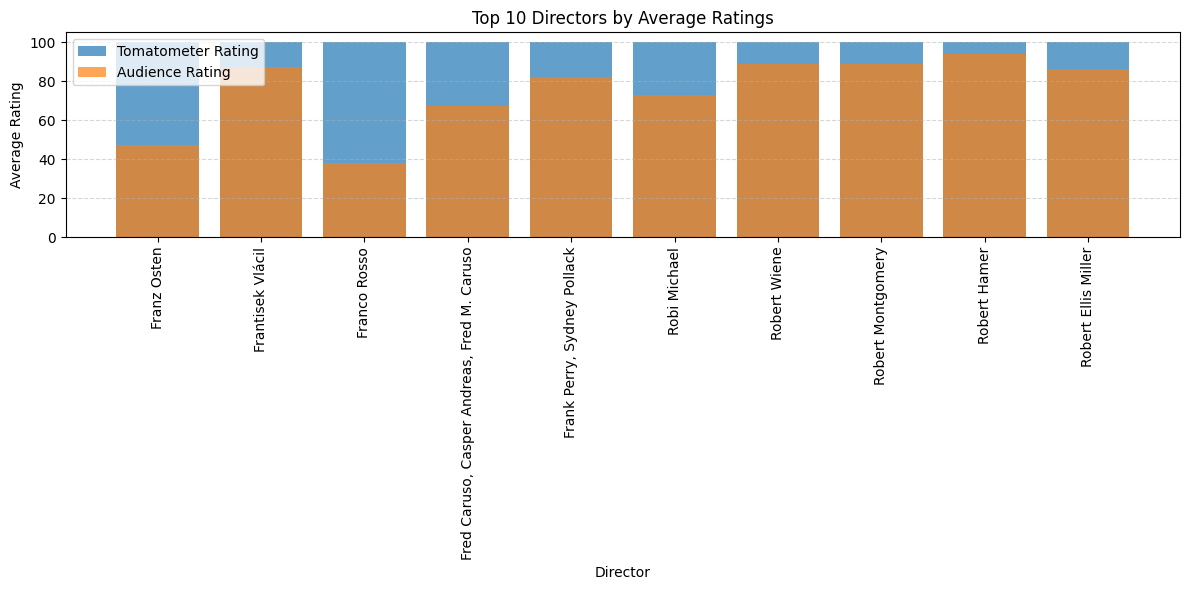

In [89]:
highest_rated_director= df.groupby('directors').agg({'tomatometer_rating': 'mean', 'audience_rating': 'mean'}).reset_index()
highest_rated_director = highest_rated_director.sort_values(by='tomatometer_rating', ascending=False).head(10)
print(highest_rated_director)
plt.figure(figsize=(12, 6))
plt.bar(highest_rated_director['directors'], highest_rated_director['tomatometer_rating'], label='Tomatometer Rating', alpha=0.7)
plt.bar(highest_rated_director['directors'], highest_rated_director['audience_rating'], label='Audience Rating', alpha=0.7)
plt.title('Top 10 Directors by Average Ratings')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

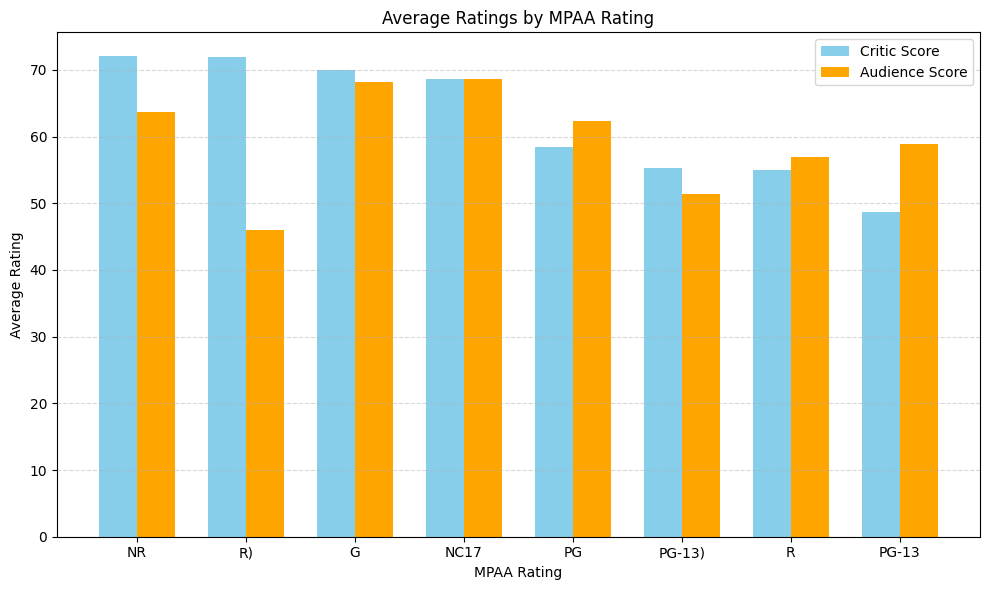

In [90]:
df_mpaa = df[['rating', 'tomatometer_rating', 'audience_rating']].dropna()
mpaa_scores = df_mpaa.groupby('rating')[['tomatometer_rating', 'audience_rating']].mean().sort_values(by='tomatometer_rating', ascending=False)

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(mpaa_scores))
plt.bar(index, mpaa_scores['tomatometer_rating'], bar_width, label='Critic Score', color='skyblue')
plt.bar([i + bar_width for i in index], mpaa_scores['audience_rating'], bar_width, label='Audience Score', color='orange')
plt.xlabel('MPAA Rating')
plt.ylabel('Average Rating')
plt.title('Average Ratings by MPAA Rating')
plt.xticks([i + bar_width / 2 for i in index], mpaa_scores.index)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [91]:
genres = df['genre'].dropna().str.split(',')
flat_genres = [g.strip() for sublist in genres for g in sublist]
genre_counts = Counter(flat_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
print(genre_df.head(10))

                        Genre  Count
2                       Drama   8140
1                      Comedy   4870
0          Action & Adventure   3058
7          Mystery & Suspense   3050
9   Art House & International   2032
4                     Romance   1691
10                     Horror   1621
3   Science Fiction & Fantasy   1559
5                    Classics   1487
6               Kids & Family    952


In [92]:
df_studio = df[['studio_name', 'tomatometer_rating']].dropna()
top_studios = df_studio.groupby('studio_name').mean().sort_values(by='tomatometer_rating', ascending=False)
studio_counts = df['studio_name'].value_counts()
valid_studios = studio_counts[studio_counts > 5].index
filtered_top_studios = top_studios.loc[top_studios.index.isin(valid_studios)]
print(filtered_top_studios.head(10))

                      tomatometer_rating
studio_name                             
Icarus Films                   95.000000
Disney/Pixar                   94.000000
Rialto Pictures                93.315789
The Cinema Guild               90.777778
Criterion Collection           90.747368
Janus Films                    90.166667
Cinema Guild                   87.700000
RKO Radio Pictures             86.071429
Big World Pictures             84.500000
New Yorker Films               84.368421


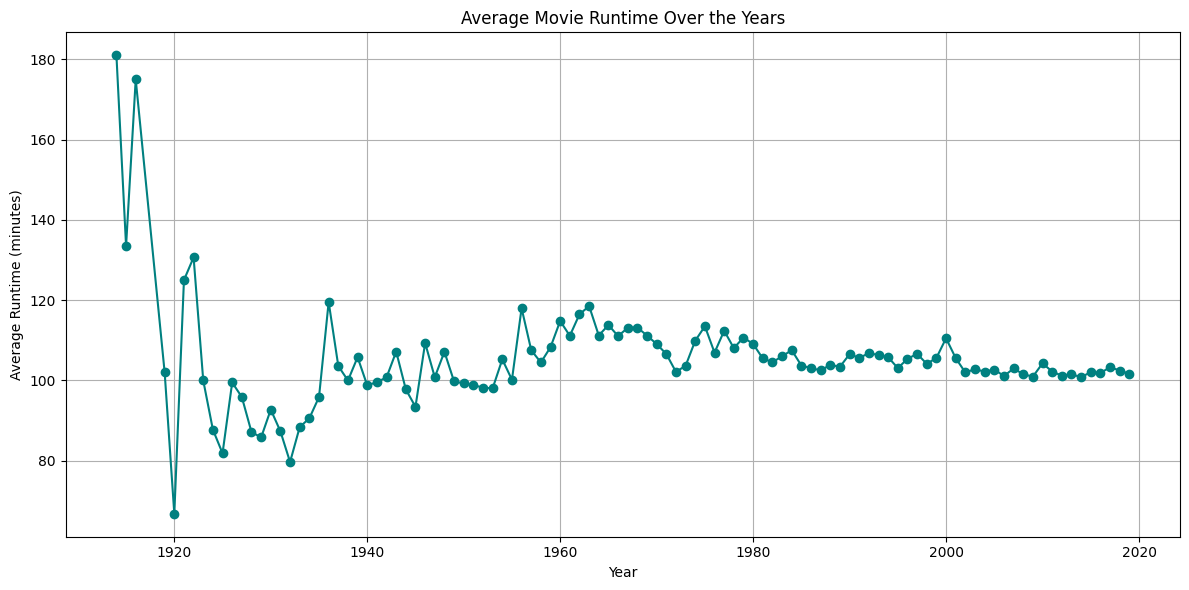

In [93]:
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
df['release_year'] = df['in_theaters_date'].dt.year

df_runtime = df[['release_year', 'runtime_in_minutes']].dropna()
avg_runtime_by_year = df_runtime.groupby('release_year').mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_runtime_by_year.index, avg_runtime_by_year['runtime_in_minutes'], marker='o', color='teal')
plt.title('Average Movie Runtime Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()